# DM_08_04
## Importar pacotes
Vamos criar um modelo oculto de Markov para analisar a mudança de estados no conjunto de dados.

In [3]:
% matplotlib inline

import pylab
import numpy as np
import pandas as pd

from hmmlearn.hmm import GaussianHMM

## Importar dados
Ler arquivo CSV em "df".

In [4]:
df = pd.read_csv("speed.csv", sep = ",")
df.head(5)

row        rt corr  Pacc prev
0    1  6.456770  cor   0.0  inc
1    2  5.602119  cor   0.0  cor
2    3  6.253829  inc   0.0  cor
3    4  5.451038  inc   0.0  inc
4    5  5.872118  inc   0.0  inc

Tirar o número da linha e "corr" para que possamos nos concentrar na influência de "prev" e "Pacc" em "rt". Também definir "prev" como fator.

In [5]:
x = df.drop(["row", "corr"], axis = 1)
x["prev"] = pd.factorize(x["prev"])[0]

## Criar modelo
Fazer HMM com 2 estados (a escolha de 2 é baseada na teoria).

In [6]:
model = GaussianHMM(n_components=2, n_iter=10000, random_state=1).fit(x)
model.monitor_

ConvergenceMonitor(history=[-116.44940310313338, -116.4467051828148], iter=8,
          n_iter=10000, tol=0.01, verbose=False)

Prever o estado oculto de cada registro e contabilizar os estados previstos.

In [7]:
states = model.predict(x)
pd.Series(states).value_counts()

0    243
1    196
dtype: int64

Calcular o tempo médio de reação (rt, reaction time) de cada um dos dois estados.

In [8]:
model.means_[:, 0]

array([ 6.40098754,  5.56434105])

## Visualizar resultados
Gerar gráfico para mostrar as mudanças de estado.

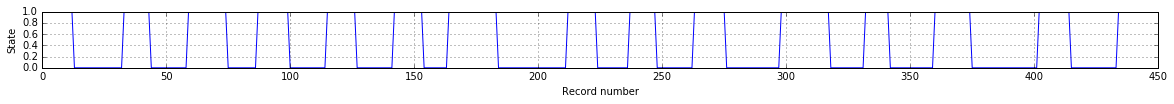

In [9]:
fig = pylab.figure(figsize=(20, 1))
ax = fig.add_subplot(111)
ax.grid(True)
ax.set_xlabel("Record number")
ax.set_ylabel("State")
ax.plot(states)